<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#005959;overflow:hidden;font-weight:800">Restaurant Reviews</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-reviews/Restaurant reviews.csv


## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

Dataset of restaurant reviews with 10000 rows and 8 columns

Dataset has 10000 rows and 8 columns.

Try to perform NLP by using the "Review" and "Rating columns"

Try sentiment analysis by considering rating above 3 as "Positive" and below 3 as "Negative"

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/restaurant-reviews/Restaurant reviews.csv")

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [4]:
# Check Dataset
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [5]:
# Check Dataset
print('### last 5 lines ###','\n')
df.tail()

### last 5 lines ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


In [6]:
# Check Dataframe information
print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [7]:
# delete column '7514' as it has only one non-null value

df.drop(["7514"], axis=1, inplace=True)

In [8]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 36


<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#005959;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> There are 36 duplicate data in the dataset. Let's delete them
</div>

In [9]:
# Delete duplicate data

df.drop_duplicates(inplace = True)

In [10]:
# Null Data
print('### Null Data ###','\n')
df.isna().sum()

### Null Data ### 



Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [11]:
# Let's exclude null values.
df = df.dropna()

In [12]:
# Null Data
print('### Null Data ###','\n')
df.isna().sum()

### Null Data ### 



Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [13]:
# Check row and column numbers

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 9955
Columns: 7


In [14]:
# Numerical features
print('### Numerical features ###','\n')
df.describe(exclude=['O'])

### Numerical features ### 



,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [15]:
# Categorical features
print('### Categorical features ###','\n')
df.describe(include=['O'])

### Categorical features ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time
count,9955,9955,9955,9955,9955,9955
unique,100,7442,9364,10,2477,9775
top,Beyond Flavours,Ankita,good,5,1 Review,7/29/2018 20:34
freq,100,13,237,3826,916,3


In [16]:
# Number of unique values per column.

df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

In [17]:
# Check the unique values and frequency for 'Rating'

df['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [18]:
# # Replace string "Like' with '5' as it is the most frequent value in the Rating column.

df['Rating'] = df['Rating'].replace(['Like'], '5')

In [19]:
# Replace column type 'Rating' to 'float'.

df['Rating'] = df['Rating'].astype(float)

In [20]:
# Rating - Maximum and Minimum value

print("Maximum: " + str(df['Rating'].max()))
print("Minimum: " + str(df['Rating'].min()))

Maximum: 5.0
Minimum: 1.0


In [21]:
# Check the unique values and frequency for 'Rating'

df['Rating'].value_counts()

Rating
5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [22]:
df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

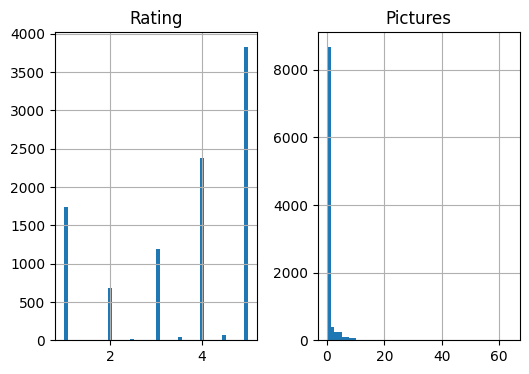

In [23]:
# Histogram

df.hist(bins=50, figsize=(6,4))
plt.show()

In [24]:
# Function to graph - Best Rating

def bar_chart(columnName):
    char_bar = df.groupby([columnName])['Rating'].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating"]))

    fig.update_layout(title="Best " + columnName + " by Rating",
                  xaxis_title=columnName,
                  yaxis_title= "Rating",
                  plot_bgcolor='black', 
                  paper_bgcolor='gray',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [25]:
bar_chart('Restaurant')

In [26]:
# Function to graph - Worst Rating

def bar_chart(columnName):
    char_bar = df.groupby([columnName])['Rating'].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating"), ascending=True)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating"]))

    fig.update_layout(title="Worst " + columnName + " by Rating",
                  xaxis_title=columnName,
                  yaxis_title= "Rating",
                  plot_bgcolor='black', 
                  paper_bgcolor='gray',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [27]:
bar_chart('Restaurant')

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Preprocessing - Sentiment</div></b>

In [28]:
# Create a copy of the dataset with only columns Review and Rating 
df=df[['Review','Rating']].copy()

# Rename columns
df = df.rename(columns={'Review': 'text', 'Rating': 'label'})
df

,text,label
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    9955 non-null   object 
 1   label   9955 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.3+ KB


In [30]:
df.label.value_counts()

label
5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [31]:
# This function returns sentiment value based on:
# label <= 3.0 -> Negative
# label > 3.0 -> Positive


def conv(row):
    
    if row['label'] <= 3.0:
        val = 'Negative'
    else: 
        val = 'Positive'
    
    return val

In [32]:
# Applying the function in our dataset
df['label'] = df.apply(conv, axis=1)
df

,text,label
0,"The ambience was good, food was quite good . h...",Positive
1,Ambience is too good for a pleasant evening. S...,Positive
2,A must try.. great food great ambience. Thnx f...,Positive
3,Soumen das and Arun was a great guy. Only beca...,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,Positive
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,Negative
9996,This place has never disappointed us.. The foo...,Positive
9997,"Bad rating is mainly because of ""Chicken Bone ...",Negative
9998,I personally love and prefer Chinese Food. Had...,Positive


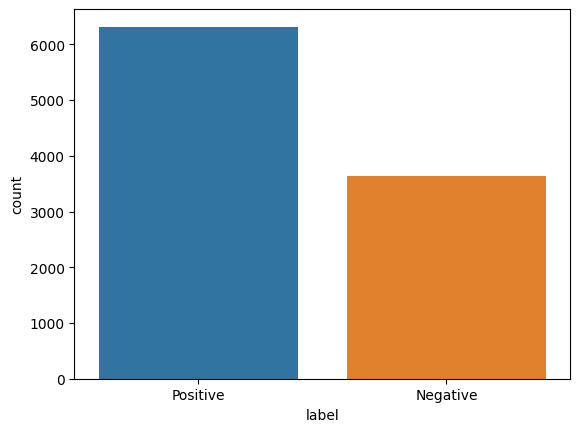

In [33]:
sns.countplot(x ='label', data = df)
 
plt.show()

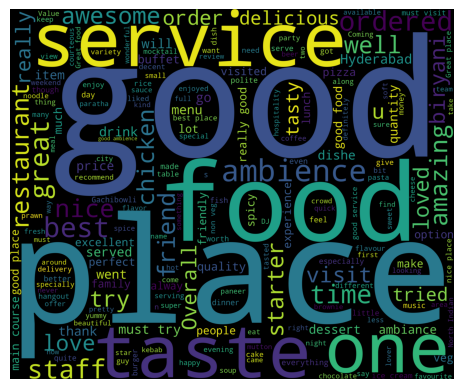

In [34]:
# WordCloud - Sentiment Positive

df1 = df[df['label']== 'Positive']
words = ' '.join(df1['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

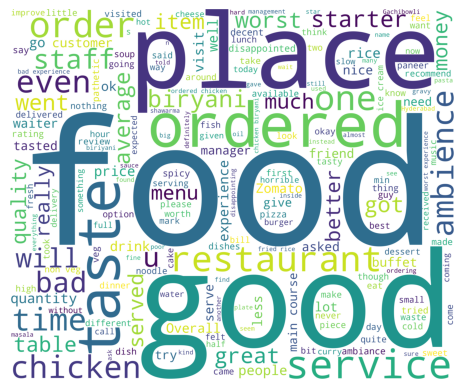

In [35]:
# WordCloud - Sentiment Negative

df2 = df[df['label']=='Negative']
words = ' '.join(df2['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Cleaning label column**

In [36]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [37]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [38]:
df['labels'] = df['label'].apply(lambda x:0 if x=='negative' else 1)
df['clean_tweet'] = df['text'].astype(str).apply(lambda x:tweet_to_words(x))
df['tweet_length'] = df['text'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(df,test_size=0.2,random_state=123)

In [39]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  Model Built</div></b>

In [41]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()]

In [42]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['label'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['label'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['label'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy) + '%')

Accuracy of LogisticRegression is: 62.73229532898041%
Accuracy of KNeighborsClassifier is: 71.12004018081366%
Accuracy of DecisionTreeClassifier is: 77.3982923154194%
Accuracy of RandomForestClassifier is: 85.53490708186841%
Accuracy of AdaBoostClassifier is: 80.96433952787544%
Accuracy of GaussianNB is: 58.6639879457559%
Accuracy of CatBoostClassifier is: 84.83174284279256%
Accuracy of SGDClassifier is: 83.8774485183325%


In [43]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
3,RandomForestClassifier,85.534907
6,CatBoostClassifier,84.831743
7,SGDClassifier,83.877449
4,AdaBoostClassifier,80.964340
2,DecisionTreeClassifier,77.398292
1,KNeighborsClassifier,71.120040
0,LogisticRegression,62.732295
5,GaussianNB,58.663988


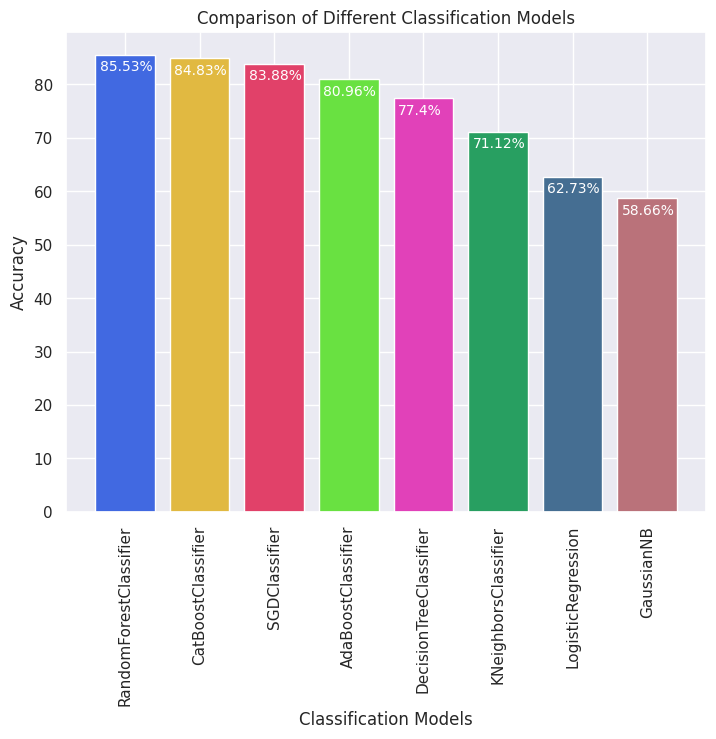

In [44]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RandomForestClassifier', 'CatBoostClassifier', 'SGDClassifier', 'AdaBoostClassifier',
          'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'GaussianNB']
Accuracy= result['Accuracy']
ax.bar(Models,Accuracy,color=['#4169e1', '#e1b941', '#e14169', '#69e141','#e141b9','#289f61','#456e92', '#ba727a']);
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()-3.0, str(round(i.get_height(),2))+ '%', fontsize=10, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models')
plt.xticks(rotation=90);

## <b><div style='padding:15px;background-color:#005959;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you.</div></b>